In [ ]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

In [ ]:
%matplotlib inline
from preprocess import KNeighborsImputer, rename_columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
field_codes = {1: "Law", 2: "Math", 3: "Social Science, Psychologist", 4: "Medical Science, Pharmaceuticals, and Bio Tech", 5: "Engineering", 6: "English/Creative Writing/ Journalism", 7: "History/Religion/Philosophy", 8: "Business/Econ/Finance ", 9: "Education, Academia", 10: "Biological Sciences/Chemistry/Physics", 11: "Social Work", 12: "Undergrad/undecided ", 13:"Political Science/International Affairs", 14:"Film", 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"}

In [3]:
frame=rename_columns(pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1"))
frame['mn_sat'] = frame.mn_sat.str.replace(r',','').astype(float)
frame['tuition'] = frame.tuition.str.replace(r',','').astype(float)
frame['income'] = frame.income.str.replace(',','').astype(float)
frame['zipcode'] = frame.zipcode.str.replace(',','').astype(float)
frame['field_cd'] = frame.field_cd.map(field_codes)

findex=frame.gender==0
mindex=frame.gender==1

In [4]:
_id = pd.Index(['iid','pid'])
personal_attributes = pd.Index(['gender','age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'initial_race_importance', 'initial_religion_importance', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
pre_survey = pd.Index(['initial_happy_expectation', 'initial_number_expectation', 'initial_attractive_importance', 'initial_sincere_importance', 'initial_intelligence_importance', 'initial_fun_importance', 'initial_ambitious_importance', 'initial_shared_interests_importance', 'initial_attractive_same_importance', 'initial_sincere_same_importance', 'initial_intelligence_same_importance', 'initial_fun_same_importance', 'initial_ambitious_same_importance', 'initial_shared_same_importance', 'initial_attractive_opposite_importance', 'initial_sincere_opposite_importance', 'initial_intelligence_opposite_importance', 'initial_fun_opposite_importance', 'initial_ambitious_opposite_importance', 'initial_shared_opposite_importance', 'initial_attractive_self_measure', 'initial_sincere_self_measure', 'initial_fun_self_measure', 'initial_intelligence_self_measure', 'initial_ambitious_self_measure', 'initial_attractive_others_measure', 'initial_sincere_others_measure', 'initial_intelligence_others_measure', 'initial_fun_others_measure', 'initial_ambitious_others_measure'])
decisions = pd.Index(['dec','match'])
partner_attributes = pd.Index(['pid','partner','int_corr', 'samerace','age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o'])
wave_conditions = pd.Index(['condtn', 'wave', 'round', 'position','positin1', 'order'])
during_survey = pd.Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met'])
halfway_survey = pd.Index(['match_es', 'halfway_attractive_importance','halfway_sincere_importance', 'halfway_intelligence_importance','halfway_fun_importance', 'halfway_ambitious_importance','halfway_shared_interests_importance','halfway_attractive_self_measure', 'halfway_sincere_self_measure','halfway_intelligence_self_measure', 'halfway_fun_self_measure','halfway_ambitious_self_measure'])
followup_survey = pd.Index(['followup_overall_satisfaction','followup_length_dates_satisfaction','followup_num_dates_satisfaction','followup_attractive_influence','followup_sincere_influence','followup_intelligence_influence','followup_fun_influence','followup_ambitious_influence','followup_shared_interests_influence','followup_attractive_importance','followup_sincere_importance','followup_intelligence_importance','followup_fun_importance','followup_ambitious_importance','followup_shared_interests_importance','followup_attractive_same_importance','followup_sincere_same_importance','followup_intelligence_same_importance','followup_fun_same_importance','followup_ambitious_same_importance','followup_shared_same_importance','followup_attractive_opposite_importance','followup_sincere_opposite_importance','followup_intelligence_opposite_importance','followup_fun_opposite_importance','followup_ambitious_opposite_importance','followup_shared_opposite_importance','followup_attractive_self_measure','followup_sincere_self_measure','followup_intelligence_self_measure','followup_fun_self_measure','followup_ambitious_self_measure','followup_attractive_others_measure','followup_sincere_others_measure','followup_intelligence_others_measure','followup_fun_others_measure','followup_ambitious_others_measure',])
final_survey = pd.Index(['final_you_call_count','final_them_call_count','final_match_dates','final_num_match_seen','final_num_match_dates','final_attractive_importance','final_sincere_importance','final_intelligence_importance','final_fun_importance','final_ambitious_importance','final_shared_interests_importance','final_attractive_influence','final_sincere_influence','final_intelligence_influence','final_fun_influence','final_ambitious_influence','final_shared_interests_influence','final_attractive_same_importance','final_sincere_same_importance','final_intelligence_same_importance','final_fun_same_importance','final_ambitious_same_importance','final_shared_same_importance','final_attractive_opposite_importance','final_sincere_opposite_importance','final_intelligence_opposite_importance','final_fun_opposite_importance','final_ambitious_opposite_importance','final_shared_opposite_importance','final_attractive_self_measure','final_sincere_self_measure','final_intelligence_self_measure','final_fun_self_measure','final_ambitious_self_measure','final_attractive_others_measure','final_sincere_others_measure','final_intelligence_others_measure','final_fun_others_measure','final_ambitious_others_measure',])

In [5]:
frame.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,final_attractive_self_measure,final_sincere_self_measure,final_intelligence_self_measure,final_fun_self_measure,final_ambitious_self_measure,final_attractive_others_measure,final_sincere_others_measure,final_intelligence_others_measure,final_fun_others_measure,final_ambitious_others_measure
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
fframe = frame.loc[findex].copy()
mframe = frame.loc[mindex].copy()

## Cleaning 

In [8]:
text_columns = frame.dtypes[(frame.dtypes==object) & (~frame.dtypes.index.str.contains('name'))].index
frame[text_columns] = frame[text_columns].apply(lambda x: x.astype('category'))
categorical_columns = frame.dtypes[frame.dtypes=='category'].index
categorical_features = frame[categorical_columns]
for col in categorical_columns:
    categorical_features[col+'_code'] = categorical_features[col].cat.codes
categorical_features.head()

,field,field_cd,undergra,from,career,field_code,field_cd_code,undergra_code,from_code,career_code
0,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
1,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
2,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
3,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
4,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300


In [9]:
unique_date = wave_conditions.drop(['condtn','positin1','round']).tolist()

attributes_columns = (pre_survey | personal_attributes | _id | ['match'] | unique_date)
attributes_frame = frame.loc[:,attributes_columns].copy()

In [10]:
attributes_frame.dropna(axis=1,thresh=8200,inplace=True)
attributes_frame.dropna(subset=['pid'],inplace=True)

for col in attributes_frame.columns:
    if hasattr(attributes_frame[col],'cat'):
        attributes_frame[col] = attributes_frame[col].cat.codes
attributes_frame = attributes_frame.replace(-1,np.nan)
attributes_frame.dropna(thresh=45,inplace=True)

In [11]:
#imputer = KNeighborsImputer(n_neighbors=6)
#filled_attributes_frame = imputer.fit_transform(attributes_frame).astype(int)
#filled_attributes_frame.to_pickle('imputed.pkl')
filled_attributes_frame = pd.read_pickle('imputed.pkl')

## Exploring

In [17]:
explore_frame = frame.copy()

from sklearn.preprocessing import MinMaxScaler

explore_frame['gender'] = explore_frame.gender.map({0:'Female',1:'Male'})
females = explore_frame.gender.where(explore_frame.gender=='Female').dropna().index
males = explore_frame.gender.where(explore_frame.gender=='Male').dropna().index

In [20]:
sns.set_context(context='talk', font_scale=1, rc={'figure.dpi':'1200','font.fantasy':'Western'})
sns.set_style('white')
#sns.set_style("font", {"xtick.major.size": 8, "ytick.major.size": 8})

In [ ]:
grouped.transform(lambda x: (~x.astype(bool)).sum() (x - x.mean()) / x.std())

In [59]:
~explore_frame.dec.astype(bool)

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7        True
8       False
9       False
10       True
11       True
12       True
13      False
14       True
15       True
16      False
17       True
18      False
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
8348     True
8349     True
8350     True
8351     True
8352     True
8353     True
8354     True
8355     True
8356    False
8357    False
8358     True
8359     True
8360    False
8361     True
8362    False
8363    False
8364    False
8365     True
8366     True
8367     True
8368     True
8369     True
8370     True
8371    False
8372     True
8373     True
8374     True
8375     True
8376     True
8377     True
Name: dec, dtype: bool

In [69]:
explore_frame['round']

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
8348    22
8349    22
8350    22
8351    22
8352    22
8353    22
8354    22
8355    22
8356    22
8357    22
8358    22
8359    22
8360    22
8361    22
8362    22
8363    22
8364    22
8365    22
8366    22
8367    22
8368    22
8369    22
8370    22
8371    22
8372    22
8373    22
8374    22
8375    22
8376    22
8377    22
Name: round, dtype: int64

In [ ]:
gridspec_kws : dict, optional
Dictionary of keyword arguments passed to matplotlib's ``gridspec``
module (via ``plt.subplots``). Requires matplotlib >= 1.4 and is
ignored if ``col_wrap`` is not ``None``.


In [122]:
g.

In [141]:
explore_frame['mask'] = 0

README.md    Speed Dating


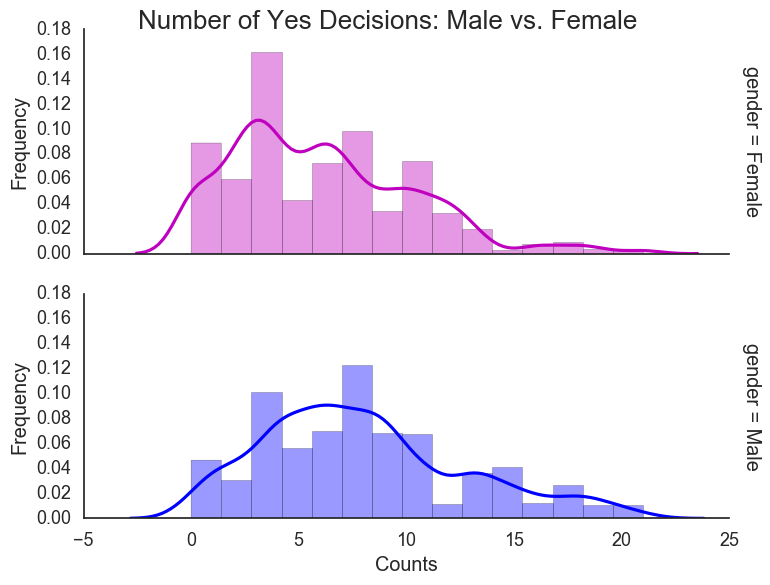

In [155]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['dec_person'] = explore_frame.groupby(['iid'])['dec'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['dec_person'] = explore_frame['round'] - explore_frame['dec_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=2.5,size=3,margin_titles=True,)

#g.map(sns.distplot,a=explore_frame.dec)
g.fig.suptitle('Number of Yes Decisions: Male vs. Female',fontsize='large')
g.map(sns.distplot,'dec_person',bins=15,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
g.savefig('../Assets/Dec_per_person.svg', format='svg', dpi=1200)
plt.show();

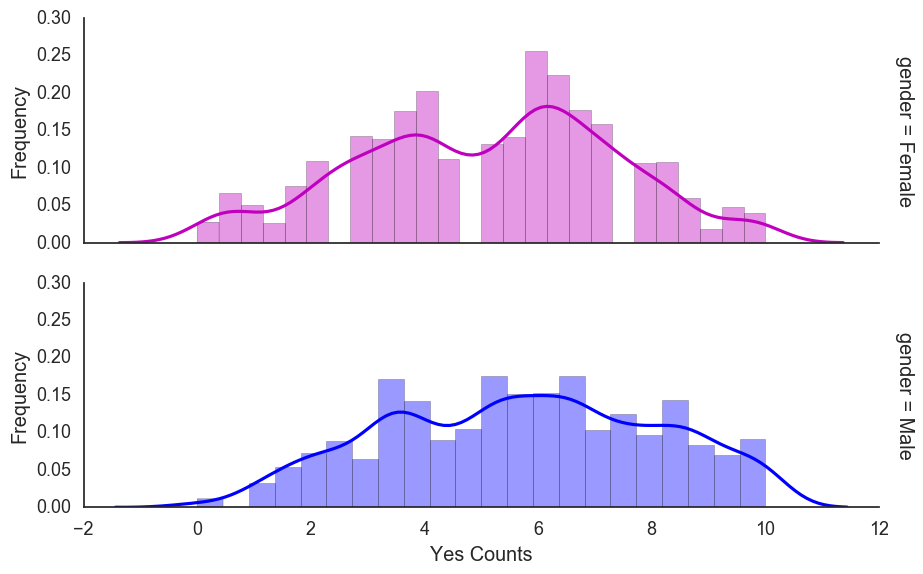

In [21]:
explore_frame['dec_person'] = explore_frame.groupby(['iid'])['dec'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['dec_person'] = explore_frame['round'] - explore_frame['dec_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=2.5,size=3,margin_titles=True,)

#g.map(sns.distplot,a=explore_frame.dec)
g.fig.suptitle('Number of Yes Decisions: Male vs. Female',fontsize='large')
g.map(sns.distplot,'dec_person',bins=15,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
g.savefig('../Assets/Dec_per_person.svg', format='svg', dpi=1200)
plt.show();



In [ ]:
fframe['dec_person'] = frame.groupby(['gender','iid'])['dec'].transform(sum)



fframe['dec_person'] = fframe.dec_person.subtract(fframe['round'])+fframe['round'].max()
fframe['dec_person'] = minmax.fit_transform(fframe['dec_person'])

mframe['dec_person'] = frame.groupby(['iid'])['dec'].transform(sum)
mframe['dec_person'] = mframe.dec_person.subtract(mframe['round'])+mframe['round'].max()
mframe['dec_person'] = minmax.fit_transform(mframe['dec_person'])




fig = plt.figure(figsize=(20,10),dpi=1200)
plt.title('Number of Positive Decision Counts per Person: Men vs Women')

#sns.FacetGrid()




ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

sns.distplot(fframe.dec_person, color="m",bins=20,label="Female",ax=ax1)
sns.distplot(mframe.dec_person, color="b",bins=20,label='Male',ax=ax2)

plt.ylabel('')

plt.legend()
plt.show()
fig.set_tight_layout(True)
#fig.savefig('../Assets/Dec_per_person.svg', format='svg', dpi=1200)

In [ ]:
fframe['match_person'] = fframe.groupby(['iid'])['match'].transform(sum)
fframe['match_person'] = fframe.match_person.subtract(fframe['round'])+fframe['round'].max()
fframe['match_person'] = minmax.fit_transform(fframe['match_person'])

mframe['match_person'] = mframe.groupby(['wave','iid'])['match'].transform(sum)
mframe['match_person'] = mframe.match_person.subtract(mframe['round'])+mframe['round'].max()
mframe['match_person'] = minmax.fit_transform(mframe['match_person'])


sns.distplot(fframe.match_person, color="m",bins=21,label="Female")
sns.distplot(mframe.match_person, color="b",bins=21,label='Male')
plt.title('Number of Matches per Person: Men vs Women')
plt.xlabel('Match Count')
plt.legend()
plt.show()

In [ ]:
iid_attributes = attributes_frame.groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[['field', 'field_cd', 'from', 'career']] = iid_attributes[['field', 'field_cd', 'from', 'career']].apply(lambda x: x.astype('category'))
iid_attributes['field_cd'] = iid_attributes.field_cd.map(field_codes).astype('category')
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
iid_attributes['gender'] = iid_attributes.gender.map({0:'Female',1:'Male'})
female_attributes = iid_attributes.loc[iid_attributes.gender=="Female"].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender=="Male"].drop('gender',axis=1)
#iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [ ]:
gender_field = iid_attributes.copy()[['field_cd','gender']]
gender_field['field_code'] = gender_field.field_cd.cat.codes
gender_field['gender_code'] = (gender_field.gender=='Male').astype(int)
gender_field['scaled_counts'] = gender_field.field_code

ffield = gender_field.loc[gender_field.gender_code==0]
mfield = gender_field.loc[gender_field.gender_code==1]

male_field_counts = mfield.field_cd.value_counts()/mfield.field_cd.value_counts().sum()*500
female_field_counts = ffield.field_cd.value_counts()/ffield.field_cd.value_counts().sum()*500

male_field_counts.name = 'Male'
female_field_counts.name = 'Female'

combined_counts = pd.concat([male_field_counts,female_field_counts],axis=1)

combined_counts['diffMale'] = combined_counts['Male']-combined_counts['Female']
combined_counts['diffFemale'] = combined_counts['Female']-combined_counts['Male']
combined_counts.where(combined_counts>0,inplace=True)
combined_counts['diffFemale'] = -combined_counts['diffFemale']

In [ ]:
plot_order = combined_counts.sort_values(by=['diffMale','diffFemale'],ascending=False).index

sns.set_style('white')

plt.figure(figsize=(16,12),dpi=1000)
sns.barplot(y=combined_counts.index,x='diffMale',
            data=combined_counts,color='blue',alpha=.5,order=plot_order,label='Male')
g=sns.barplot(y=combined_counts.index,x='diffFemale',
            data=combined_counts,color='m',alpha=.5,order=plot_order,label='Female')
g.set_autoscale_on(True)
g.set_rasterized(True)
plt.yticks(size='x-large',)
plt.xticks(range(1,2),'')
plt.xlabel('Counts', fontsize='xx-large')
plt.ylabel('Fields', fontsize='xx-large')
plt.legend(fontsize='x-large',loc=0);

In [ ]:
from imblearn.over_sampling import SMOTE
a=iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')]
a.dropna(inplace=True)
smote = SMOTE()
x,y = smote.fit_sample(a.drop('gender',axis=1),a.gender)
df = pd.DataFrame(data=np.log(x),columns=a.columns.drop('gender'))
df['gender']=y
df.fillna(0,inplace=True)

In [ ]:
g = sns.pairplot(data=df, hue="gender", palette="husl")
g.map_diag(sns.distplot,norm_hist=True)

In [ ]:
a[a.columns.drop('gender')] = scale(a.drop('gender',axis=1))

In [ ]:
iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')]

In [ ]:
sns.distplot(iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')])

In [ ]:
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
iid_attributes = frame[attributes_columns].groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[text_columns] = iid_attributes[text_columns].apply(lambda x: x.astype('category'))
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
female_attributes = iid_attributes.loc[iid_attributes.gender==0].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender==1].drop('gender',axis=1)
iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [ ]:
field.shape,ffield.shape,mfield.shape

In [ ]:
ffield = pd.DataFrame(female_attributes.field.value_counts()).rename(columns={'field':'female_counts'})
mfield = pd.DataFrame(male_attributes.field.value_counts()).rename(columns={'field':'male_counts'})

In [ ]:
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(scale(field),metric='correlation')

In [ ]:
corr = pd.DataFrame(1-dist,columns=field.index,index=field.index)

In [ ]:
corr = pd.DataFrame(1-dist,columns=field.index,index=field.index)
#corr = field.apply(lambda x: x/field.sum(1)).fillna(0).T.corr()
corr = corr.where(lambda x: (-.3>x) | (x>.3))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
field.loc['English']

In [ ]:
frame.field_cd.isnull().sum()

In [ ]:
field.index.shape,frame.field_cd.unique().shape

In [ ]:
fframe.field.value_counts().loc['Non_Fiction']#,fframe.field.value_counts().loc['English']

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=15, yticklabels=15,robust=False,
            linewidths=.01, cbar_kws={"shrink": .3},ax=ax,)

## Predict

In [ ]:
fmask_attributes = filled_attributes_frame.loc[frame.gender==0].drop('gender',axis=1)
mmask_attributes =  filled_attributes_frame.loc[frame.gender==1].drop('gender',axis=1)

In [ ]:
grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

In [ ]:
merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [ ]:
dataset = merged_attributes
X = merged_attributes.drop("match",axis=1)
y = merged_attributes["match"]
predictors = merged_attributes.drop(["match",'iid_y','iid_x'],axis=1).columns

In [ ]:
from sklearn.linear_model import LogisticRegression 
from imblearn import over_sampling,combine
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
def modelfit(model, data, xcolumns=predictors, ycolumn='match', title='Model', test_size=.25, n_folds=3, scale_data=True):
    
    from sklearn.cross_validation import StratifiedKFold, train_test_split,cross_val_score
    from sklearn.metrics import classification_report, accuracy_score, roc_auc_score 
    
    
    if scale_data:
        data[xcolumns] = scale(data[xcolumns])
    
    train_data, test_data = train_test_split(data, test_size=test_size,stratify=data.match)
    xtrain, ytrain, xtest, ytest = train_data[predictors], train_data['match'], test_data[predictors], test_data['match']
    
    kfold = StratifiedKFold(ytrain, n_folds=n_folds)
    
    sns.set_palette(palette='muted')
    
    resamp = combine.SMOTETomek()
    #resamp = over_sampling.RandomOverSampler()
    xresamp, yresamp = resamp.fit_sample(xtrain, ytrain)
    
    model.fit(xresamp, yresamp)        
    predictions = model.predict(xtest)
    probability = model.predict_proba(xtest)[:,1]
    cv_score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='roc_auc')
    
    #precision, recall, fbeta_score, support = precision_recall_fscore_support(test_data['dec'].values, predictions)
    
    print(classification_report(test_data[ycolumn].values, predictions))
    print ("Classification\n")
    print ("Accuracy : {0:.4f}".format(accuracy_score(ytest, predictions)))
    print ("AUC Score (Train): {0:.4f}".format(roc_auc_score(ytest, probability)))
    print ("CV Score : Mean {0:.4f} | Std {0:.4f} | Min {0:.4f} | Max {0:.4f}".format(
            np.mean(cv_score),
            np.std(cv_score),
            np.min(cv_score),
            np.max(cv_score)))
    plt.rc({'font.size': 10.0})
    
    if hasattr(model,'feature_importances_'):  
        plt.figure(figsize=(13,5))
        feat_imp = pd.Series(model.feature_importances_, xcolumns).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances',fontsize=10)
        plt.title('Feature Importances: {}'.format(title),fontdict={'size': 10})
        plt.ylabel('Feature Importance',fontsize=10)
        
        
    elif hasattr(model,'coef_'):
        if hasattr(model,'kernel') and (model.kernel == 'rbf'):
            print('No COEFs')
        else:
            plt.figure(figsize=(13,5))
            coefs_imp = pd.Series(model.coef_[0], xcolumns).sort_values(ascending=False)
            coefs_imp.plot(kind='bar',title='Coef Values: {}'.format(title),fontsize=10)
            plt.title('Coef Values',fontdict={'size': 10})
            plt.ylabel('Coef Values',fontsize=10)
        
    
    plt.show()
    print()
    print()
    return model, train_data, test_data

In [ ]:
lgr = LogisticRegression(C=1,penalty='l2')

# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
lgr, train_data, test_data = modelfit(lgr, dataset, predictors, 'match', 'Logistic Regression', n_folds=4,test_size=.20)

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=10,probability=True)

# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
svc, train_data, test_data = modelfit(svc, dataset, predictors, 'match', 'SVC', n_folds=4,test_size=.20)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.001, min_samples_split=16, n_estimators=3500,
                                                               min_samples_leaf=5,
                                                               max_depth=7,
                                                               max_features='sqrt',
                                                               subsample=0.8)
# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
gbc, train_data, test_data = modelfit(gbc, dataset, predictors, 'match', 'GBC', n_folds=4,test_size=.20,scale_data=False)

In [ ]:
model = LogisticRegression(C=1,penalty='l2')
model = SVC(kernel='',probability=True)

resamp = combine.SMOTEENN(k=4, m=12,)
xresamp, yresamp = resamp.fit_sample(train_data[predictors], train_data.match)

#kfold = StratifiedKFold(yresamp,n_folds=4)
#rfe = RFECV(model, step=1, cv=kfold, scoring='recall', estimator_params=None, verbose=1)

#rfe.fit(scale(xresamp),yresamp)
#print(classification_report(test_data.match, rfe.predict(scale(test_data[predictors]))))


model.fit(scale(xresamp),yresamp)
print(classification_report(test_data.match, model.predict(scale(test_data[predictors]))))

In [ ]:
def roc_curve_plot(y_true, y_score):
    from sklearn.metrics import roc_curve, auc

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
lgr.predict_proba(test_data[predictors])[:,1]

In [ ]:
roc_curve_plot(y_true=test_data['match'],y_score=lgr.predict_proba(test_data[predictors])[:,1])